In [1]:
import matplotlib.pyplot as plt
from statsbombpy import sb

from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from mplsoccer.pitch import Pitch

### Data

In [2]:
events = sb.events(match_id=7584)  # if you want to store all events in a given match on a single dataframe
sp = {player['position']['id']: player['player']['name'] for player in events.loc[1, 'tactics']['lineup']}
#print(sp)

df = events.query("type == 'Pass' & team == 'Japan'")
position_dict = {1: (12.0, 40.0), 6: (48.0, 72.0), 5: (30.0, 55.0), 3: (30.0, 25.0), 
                 2: (48.0, 8.0), 11: (60.0, 52.0), 9: (60.0, 28.0), 21: (78.0, 66.0), 
                 19: (82.0, 40.0), 17: (78.0, 14.0), 23: (105.0, 40.0)
                }  ##statsbomb encoded position_ids (1->GK, 23->CF etc) to rough coordinates on pitch (120x80)

credentials were not supplied. open data access only


### Plotting

<ipython-input-42-ed70688def05>:46: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.savefig("final.png", dpi=220)
c:\users\sharm\appdata\local\programs\python\python38\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


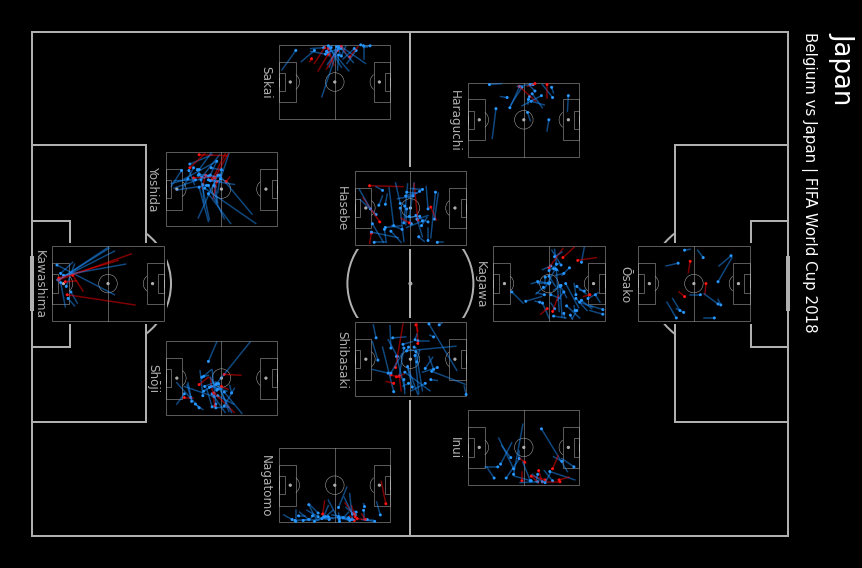

In [42]:
plt.style.use('dark_background')
def plot_inset(width, ax, player_df, x, y):
    
    ax_sub = inset_axes(ax, width=width, height=width, loc=10,
                       bbox_to_anchor=(x,y), bbox_transform=ax.transData, 
                       borderpad=0.0)
    inset_pitch.draw(ax=ax_sub) ##draw the pitches on the smaller axes
    ax_sub.invert_yaxis() ##since Statsbomb uses inverted y axes (top=0)
    
    outcomes = [True if 'outcome' not in str(row) else False for row in player_df['pass']]
    colors = ['dodgerblue' if el else 'red' for el in outcomes]
    player_df = player_df[outcomes]
    
    xs = player_df['location'].apply(lambda val: val[0])
    ys = player_df['location'].apply(lambda val: val[1])
    
    end_xs = player_df['pass'].apply(lambda val: val['end_location'][0])
    end_ys = player_df['pass'].apply(lambda val: val['end_location'][1])
    
    for x,y, end_x, end_y, color in zip(xs, ys, end_xs, end_ys, colors):
        #ax_sub.annotate(text = "", xy = (x,y), xytext=(end_x, end_y), arrowprops = {'arrowstyle':'wedge', 'facecolor': color, 
        #                                                                            'edgecolor': color, 
        #                                                                           'alpha': 0.5})
        ax_sub.plot([x,end_x], [y, end_y], color=color, alpha=.5)
   
    ax_sub.scatter(xs, ys, ec=colors, s=4)    
        
    ax_sub.patch.set_alpha(0)
    return ax

###
line_color = "#b0b0b0"
pitch = Pitch(pitch_type='statsbomb', figsize=(12,8), line_color=line_color)  #plotting a statsperform pitch
inset_pitch = Pitch(linewidth=.5, spot_scale=0.01, pitch_type='statsbomb', line_color=line_color) ##lighter linewidth for the inner pitches
fig, ax = pitch.draw()

for pl_pos_id, (x,y) in position_dict.items():
    player_name = sp[pl_pos_id]
    player_df = df.query("player == @player_name")
    ax = plot_inset(width = 1.65, ax= ax, player_df = player_df, x=x, y=y)
    ax.text(x-12, y, player_name.split(" ")[-1].capitalize(), rotation=270, va='center', color=line_color, fontsize=12)

    
ax.text(126.5, 0, "Japan", rotation=270, fontsize=26, va='top')    
ax.text(122, 0, "Belgium vs Japan | FIFA World Cup 2018", rotation=270, fontsize=15, va='top'); 
#fig.savefig("final.png", dpi=220)    